In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [12]:
# Load CSV file
from scipy import stats

df = pd.read_csv('GWST_final_results.csv')
df



df.loc[0, 'frailty_score'] = 1
df.loc[1, 'frailty_score'] = 100
df

# testing input 
# [[236.67437496  61.64381861  40.87442362  35.8396329   52.19643271
#    35.90027247   3.83938536   1.4563886 ]]
testing_input_low = [[236.67437496,61.64381861,40.87442362,35.8396329, 52.19643271
, 35.90027247, 3.83938536, 1.4563886 ]]
testing_input_high = [[71.41728169,28.95328405,1.82795697,8.92581728,5.37661073,19.6955194
, 2.46663838,0.60236621]]


In [13]:
# drop all columns with headers that contain 'circular_mean' or 'circular_std' or 'mean_magnitude'
df = df[df.columns.drop(list(df.filter(regex='circular_mean')))]
df = df[df.columns.drop(list(df.filter(regex='circular_std')))]
df = df[df.columns.drop(list(df.filter(regex='mean_magnitude')))]
relevant_keypoints = ["RIGHT_ANKLE", "RIGHT_KNEE", "RIGHT_HIP", "RIGHT_SHOULDER"]
# drop all non relevant keypoints
df = df[df.columns.drop(list(df.filter(regex='LEFT')))]
df = df[df.columns.drop(list(df.filter(regex='NOSE')))]
df = df[df.columns.drop(list(df.filter(regex='TOE')))]


# drop distance_walked
df = df.drop(columns=['distance_walked'])
df = df.drop(columns=['elapsed_time'])

df.sort_values(by=['frailty_score'], inplace=True)
df



,test,average_speed,average_stride_length,RIGHT_SHOULDER_std_dev,RIGHT_HIP_std_dev,RIGHT_KNEE_std_dev,RIGHT_ANKLE_std_dev,frailty_score
0,Gait Speed Walk Test,219.293835,56.360063,39.500541,55.415046,50.398111,34.613602,1.0
1,Gait Speed Walk Test,71.417282,28.953284,1.827957,8.925817,5.376611,19.695519,100.0


38.1134071943486


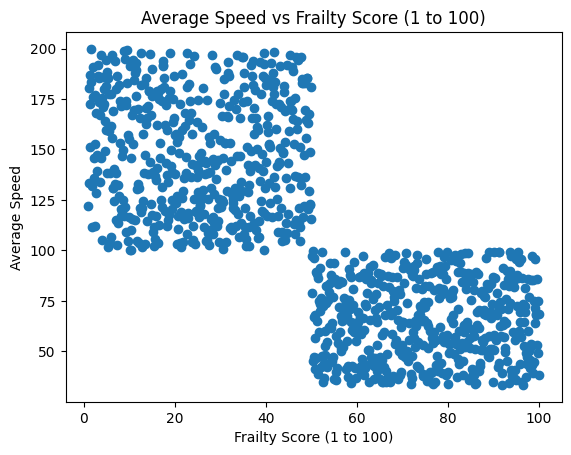

In [15]:
import pandas as pd
imported_syntethic_df = pd.read_csv('synthetic_data.csv')
imported_syntethic_df.drop(columns=['Unnamed: 0'], inplace=True)

# average speed to average stride length ratio
imported_syntethic_df['speed_to_stride_ratio'] = imported_syntethic_df['average_speed'] / imported_syntethic_df['average_stride_length']
# Knee to hip ratio
imported_syntethic_df['knee_to_hip_ratio'] = imported_syntethic_df['RIGHT_KNEE_std_dev'] / imported_syntethic_df['RIGHT_HIP_std_dev']

imported_syntethic_df



,average_speed,average_stride_length,RIGHT_SHOULDER_std_dev,RIGHT_HIP_std_dev,RIGHT_KNEE_std_dev,RIGHT_ANKLE_std_dev,frailty_score,speed_to_stride_ratio,knee_to_hip_ratio
0,122.055064,40.743849,35.165832,20.191496,21.471289,31.472785,1.0,2.995668,1.063383
1,180.222092,45.142204,26.889343,41.597641,26.575698,30.213270,1.1,3.992319,0.638875
2,133.246787,51.134680,39.198827,12.000900,48.883441,27.684364,1.2,2.605801,4.073315
3,172.486591,43.381202,11.912091,36.359233,14.508620,23.373482,1.3,3.976068,0.399035
4,187.005526,30.429345,11.528430,17.609193,40.123529,24.990979,1.4,6.145565,2.278556
...,...,...,...,...,...,...,...,...,...
995,86.007714,42.766775,35.712806,49.568472,11.291089,31.361569,99.6,2.011087,0.227788
996,49.005456,29.435912,4.670384,29.628403,16.615155,31.165556,99.7,1.664819,0.560785
997,75.023787,41.449254,21.021442,12.942282,25.659248,31.958570,99.8,1.810015,1.982591
998,68.416257,53.239833,28.036586,23.436799,12.267364,23.012383,99.9,1.285058,0.523423


In [16]:
X = imported_syntethic_df.drop(columns=['frailty_score'])
print(X.columns)

y = imported_syntethic_df['frailty_score']
# y

Index(['average_speed', 'average_stride_length', 'RIGHT_SHOULDER_std_dev',
       'RIGHT_HIP_std_dev', 'RIGHT_KNEE_std_dev', 'RIGHT_ANKLE_std_dev',
       'speed_to_stride_ratio', 'knee_to_hip_ratio'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and target (y)
X = imported_syntethic_df.drop(columns=['frailty_score'])  # All columns except frailty_score
y = imported_syntethic_df['frailty_score']  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = lr_model.score(X_test, y_test)
lr_frailty_low = lr_model.predict(testing_input_low)
lr_frailty_high = lr_model.predict(testing_input_high)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2_score:.2f}')

# print(lr_model.predict(testing_input.drop(columns=['frailty_score']).values.reshape(1, -1)))

Mean Absolute Error: 15.66
Mean Squared Error: 339.50
R^2 Score: 0.58


/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a weight map for the features
weight_map = {
    'average_speed': 5.0,            # Highest weight for average speed
    'RIGHT_HIP_std_dev': 3.0,        # Second highest for hip std deviation
    'average_stride_length': 2.0,    # Third for stride length
    'RIGHT_SHOULDER_std_dev': 1.5,   # Fourth for shoulder std deviation
    'RIGHT_KNEE_std_dev': 1.2,       # Fifth for knee std deviation
    'RIGHT_ANKLE_std_dev': 0.8,      # Lowest for ankle std deviation
    'speed_to_stride_ratio': 4.0,     # Feature engineering efforts
    'knee_to_hip_ratio': 3.0  
}
# weight map with all 1s
# weight_map = {
#     'average_speed': 1.0,            # Highest weight for average speed
#     'RIGHT_HIP_std_dev': 1.0,        # Second highest for hip std deviation
#     'average_stride_length': 1.0,    # Third for stride length
#     'RIGHT_SHOULDER_std_dev': 1.0,   # Fourth for shoulder std deviation
#     'RIGHT_KNEE_std_dev': 1.0,       # Fifth for knee std deviation
#     'RIGHT_ANKLE_std_dev': 1.0,      # Lowest for ankle std deviation
#     'speed_to_stride_ratio': 1.0,     # Feature engineering efforts
#     'knee_to_hip_ratio': 1.0
# }
    

# Apply the weight map to the training and testing data
X_train_weighted = X_train.copy()
X_test_weighted = X_test.copy()

for feature, weight in weight_map.items():
    X_train_weighted[feature] = X_train_weighted[feature] * weight
    X_test_weighted[feature] = X_test_weighted[feature] * weight
    testing_input_low[0][X.columns.get_loc(feature)] = testing_input_low[0][X.columns.get_loc(feature)] * weight
    testing_input_high[0][X.columns.get_loc(feature)] = testing_input_high[0][X.columns.get_loc(feature)] * weight

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model with weighted features
rf_model.fit(X_train_weighted, y_train)

# Make predictions on the weighted test set
y_pred_rf = rf_model.predict(X_test_weighted)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_score_rf = rf_model.score(X_test_weighted, y_test)
rf_frailty_low = rf_model.predict(testing_input_low)
rf_frailty_high = rf_model.predict(testing_input_high)

print(f'Random Forest Mean Absolute Error: {mae_rf:.2f}')
print(f'Random Forest Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest R^2 Score: {r2_score_rf:.2f}')

# Adjust the testing_input with the weight map and make predictions
# testing_input_weighted = testing_input.copy()
# for feature, weight in weight_map.items():
#     testing_input_weighted[feature] = testing_input_weighted[feature] * weight

# # Make prediction for the single testing input
# prediction = rf_model.predict(testing_input_weighted.values.reshape(1, -1))
# print(f"Predicted frailty score for the testing input: {prediction[0]:.2f}")


Random Forest Mean Absolute Error: 13.05
Random Forest Mean Squared Error: 230.04
Random Forest R^2 Score: 0.71


/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


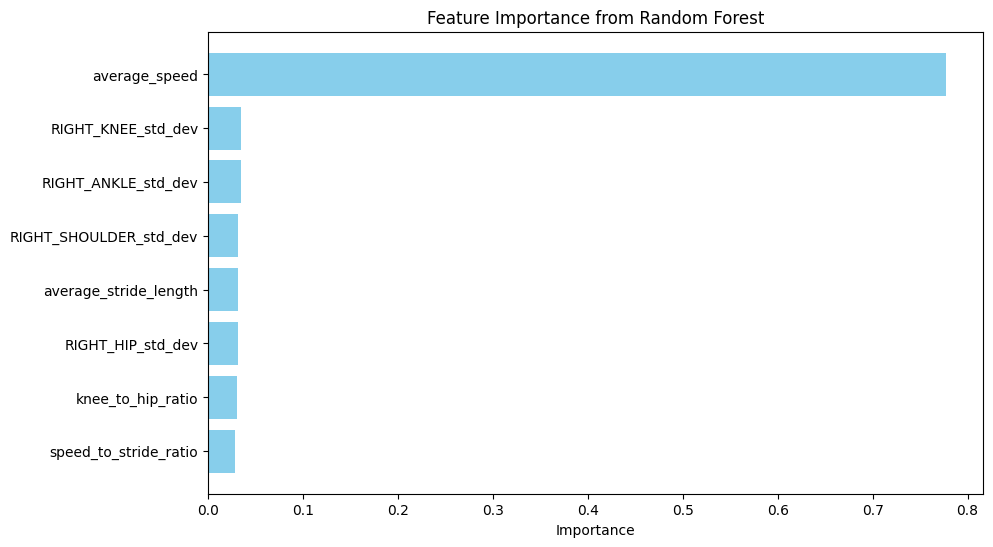

In [19]:
# Import the required library for plotting
import matplotlib.pyplot as plt

# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get the feature names from the dataset
feature_names = X_train.columns

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the feature importances in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Add more estimators
#     'max_depth': [None, 10, 20, 30, 40],   # Expand depth range
#     'min_samples_split': [2, 5, 10, 15],   # Test larger splits
#     'min_samples_leaf': [1, 2, 4, 6],      # Include larger values for leaf nodes
#     'bootstrap': [True, False],
#     'max_features': ['auto', 'sqrt', 'log2'],  # Add feature sampling techniques
# }


# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search model to the training data
grid_search.fit(X_train_weighted, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Get the best estimator (model with the best parameters)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test_weighted)
print(f"y_pred_best_rf: {y_pred_best_rf}")
# Calculate performance metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 

In [23]:
# XGBoost Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Apply the weight map to the training and testing data
X_train_weighted = X_train.copy()
X_test_weighted = X_test.copy()

# adjust the testing input with the weight map


 

for feature, weight in weight_map.items():
    X_train_weighted[feature] = X_train_weighted[feature] * weight
    X_test_weighted[feature] = X_test_weighted[feature] * weight


# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the XGBoost model with weighted features
xgb_model.fit(X_train_weighted, y_train)

# Make predictions on the weighted test set
y_pred_xgb = xgb_model.predict(X_test_weighted)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_score_xgb = xgb_model.score(X_test_weighted, y_test)
xgb_frailty_low = xgb_model.predict(testing_input_low)
xgb_frailty_high = xgb_model.predict(testing_input_high)

print(f'XGBoost Mean Absolute Error: {mae_xgb:.2f}')
print(f'XGBoost Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost R^2 Score: {r2_score_xgb:.2f}')




XGBoost Mean Absolute Error: 13.22
XGBoost Mean Squared Error: 245.28
XGBoost R^2 Score: 0.69


In [24]:
# print all scores for different models
print(f"Linear Regression Model MAE: {mae:.2f}")
print(f"Random Forest Model MAE: {mae_rf:.2f}")
print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"XGBoost Model MAE: {mae_xgb:.2f}")

# print all scores for different models
print(f"Linear Regression Model MSE: {mse:.2f}")
print(f"Random Forest Model MSE: {mse_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")
print(f"XGBoost Model MSE: {mse_xgb:.2f}")

# print all scores for different models
print(f"Linear Regression Model R^2 Score: {r2_score:.2f}")
print(f"Random Forest Model R^2 Score: {r2_score_rf:.2f}")
print(f"Best Random Forest Model R^2 Score: {best_rf_model.score(X_test_weighted, y_test):.2f}")
print(f"XGBoost Model R^2 Score: {r2_score_xgb:.2f}")

# present in a table format
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Best Random Forest', 'XGBoost'],
    'MAE': [mae, mae_rf, mae_best_rf, mae_xgb],
    'MSE': [mse, mse_rf, mse_best_rf, mse_xgb],
    'R^2 Score': [r2_score, r2_score_rf, best_rf_model.score(X_test_weighted, y_test), r2_score_xgb]
})
print(model_results)

# print the frailty scores for the testing input
print(f"Linear Regression Model Predictions: {lr_frailty_low, lr_frailty_high}")
print(f"Random Forest Model Predictions: {rf_frailty_low, rf_frailty_high}")
print(f"XGBoost Model Predictions: {xgb_frailty_low, xgb_frailty_high}")
testing_input_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Low Frailty Score': [lr_frailty_low[0], rf_frailty_low[0], xgb_frailty_low[0]],
    'High Frailty Score': [lr_frailty_high[0], rf_frailty_high[0], xgb_frailty_high[0]]
})
print(testing_input_results)


Linear Regression Model MAE: 15.66
Random Forest Model MAE: 13.05
Best Random Forest Model MAE: 12.82
XGBoost Model MAE: 13.22
Linear Regression Model MSE: 339.50
Random Forest Model MSE: 230.04
Best Random Forest Model MSE: 221.00
XGBoost Model MSE: 245.28
Linear Regression Model R^2 Score: 0.58
Random Forest Model R^2 Score: 0.71
Best Random Forest Model R^2 Score: 0.72
XGBoost Model R^2 Score: 0.69
                Model        MAE         MSE  R^2 Score
0   Linear Regression  15.657380  339.499406   0.577085
1       Random Forest  13.047180  230.044116   0.713434
2  Best Random Forest  12.821906  221.003794   0.724695
3             XGBoost  13.219843  245.279561   0.694455
Linear Regression Model Predictions: (array([-4.89872834]), array([66.17616295]))
Random Forest Model Predictions: (array([19.397]), array([77.969]))
XGBoost Model Predictions: (array([20.871336], dtype=float32), array([72.69854], dtype=float32))
               Model  Low Frailty Score  High Frailty Score
0  Linea

In [25]:
import joblib
joblib.dump(best_rf_model, 'gswt_random_forest_model.pkl')


['gswt_random_forest_model.pkl']

In [31]:
# use my .pkl file to predict something
# Load the saved model
loaded_model = joblib.load('gswt_random_forest_model.pkl')

# Make prediction for the single testing input using the loaded model
prediction_loaded_model = loaded_model.predict(testing_input_weighted.values.reshape(1, -1))
prediction_loaded_model

/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.80162924])

In [27]:
frailty_score_low = best_rf_model.predict(testing_input_low)
print(f"Frailty Score Low: {frailty_score_low}")
frailty_score_high = best_rf_model.predict(testing_input_high)
print(f"Frailty Score High: {frailty_score_high}")

Frailty Score Low: [21.7051705]
Frailty Score High: [77.74336806]


/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
